# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [4]:
df_select = df[["case_status", "class_of_admission", "country_of_citizenship", "employer_city", "wage_offer_from_9089"]]
df_select.head()

,case_status,class_of_admission,country_of_citizenship,employer_city,wage_offer_from_9089
0,Certified,J-1,NaN,NEW YORK,75629.0
1,Denied,B-2,NaN,CARLSTADT,37024.0
2,Certified,H-1B,NaN,GLEN ALLEN,47923.0
3,Certified,B-2,NaN,FLUSHING,10.97
4,Certified,L-1,NaN,ALBANY,100000.0


In [5]:
df_select.isnull().any()

case_status               False
class_of_admission         True
country_of_citizenship     True
employer_city              True
wage_offer_from_9089       True
dtype: bool

# 3.) Clean your data for a decision tree


In [12]:
df_select.dropna(inplace = True)
df_select.reset_index(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
df_select["wage_offer_from_9089"] = pd.to_numeric(df_select["wage_offer_from_9089"], errors='coerce')

<ipython-input-13-f4e2354017db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["wage_offer_from_9089"] = pd.to_numeric(df_select["wage_offer_from_9089"], errors='coerce')


In [14]:
# Prepare to use LabelEncoder to label every categorical variable
from sklearn.preprocessing import LabelEncoder

In [15]:
column_names = list(("case_status", "class_of_admission", "country_of_citizenship", "employer_city"))

le_dict = {}
for column in column_names:
  le = LabelEncoder()
  df_select[f"{column}_labeled"] = le.fit_transform(df_select[column])
  le_dict[column] = le

df_select.head()

<ipython-input-15-e9ee54e7736b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select[f"{column}_labeled"] = le.fit_transform(df_select[column])


,level_0,index,case_status,class_of_admission,country_of_citizenship,employer_city,wage_offer_from_9089,case_status_labeled,class_of_admission_labeled,country_of_citizenship_labeled,employer_city_labeled
0,50,135341,Denied,EWI,MEXICO,POMFRET,8.41,2,10,108,3490
1,129,135434,Certified,Not in USA,SOUTH KOREA,HUNTSVILLE,7.00,0,31,147,1946
2,148,135457,Denied,H-1B,INDIA,PALO ALTO,57.69,2,17,73,3394
3,151,135460,Denied,R-1,SOUTH KOREA,NEW YORK,38.38,2,41,147,3058
4,172,135485,Denied,B-2,PHILIPPINES,INDIANAPOLIS,8.11,2,3,128,2059


In [16]:
# Find X and y for model training
X = df_select[['class_of_admission_labeled', 'country_of_citizenship_labeled', 'employer_city_labeled', 'wage_offer_from_9089']]
y = df_select[['case_status_labeled']] 

# 4.) Fit and plot a decision tree of depth 3


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

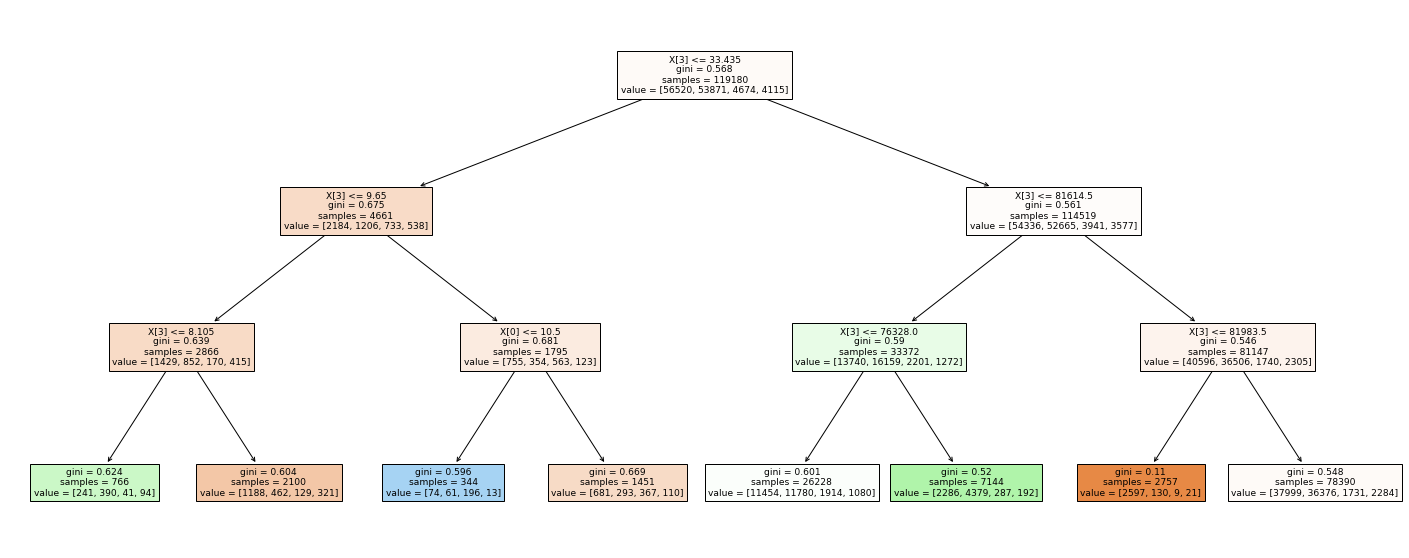

In [18]:
# Fit the decision tree model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf, filled=True)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


The sample size of the largest leaf node can be an indicator of the confidence of the decision tree in its categorizing for that particular group of samples, which is the last group among the results. It contains 78,390 samples with a gini impurity of 0.548, which is at moderate level. This indicates that the influence of wage data is the most significant among the 4 features selected, and it is not possible to judge the suitability of the other three indicators for segmenting this dataset.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
outputs = []
max_depths = [1,2,3,4,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
for md in max_depths:
  clf = DecisionTreeClassifier(max_depth=md)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  outputs.append(score)

print(outputs)

[0.4730659506628629, 0.49345527773116293, 0.49563685182077527, 0.5128796777982884, 0.5123342842758852]


From the test results, we can find the for 4-step decision tree has the highest accuracy for out-of-sample testing.